### Regression model

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
 

In [63]:
car_price_datasets = pd.read_csv("car data.csv")

In [64]:
car_price_datasets.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [65]:
car_price_datasets.shape

(301, 9)

In [66]:
car_price_datasets.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [67]:
car_price_datasets.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [68]:
car_price_datasets['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [69]:
car_price_datasets['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [70]:
car_price_datasets['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [71]:
##Encoding the categorical data
#1. Fuel type column
car_price_datasets.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#1. Seller type column
car_price_datasets.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)

#1. transmission column
car_price_datasets.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_5776\584590328.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price_datasets.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_5776\584590328.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price_datasets.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_5776\584590328.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

In [72]:
car_price_datasets.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitiing the data into training data and test data

In [73]:
X = car_price_datasets.drop(['Selling_Price','Car_Name'],axis = 1)
Y = car_price_datasets['Selling_Price']

In [74]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [75]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting training and test data 

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [77]:
print(X_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

In [78]:
print(X_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

In [79]:
X_train.shape

(270, 7)

In [80]:
X_test.shape

(31, 7)

In [81]:
Y_train.shape

(270,)

In [82]:
Y_test.shape

(31,)

### Model Training: Linear Regression

In [83]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [84]:
lin_reg_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation

In [85]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)


In [86]:
#R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8799451660493699


### Visualize the actual prices and predicted prices

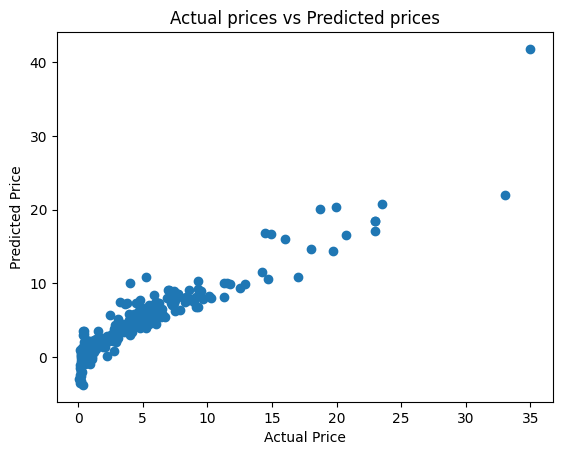

In [87]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [88]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)


In [89]:
#R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8365766715026473


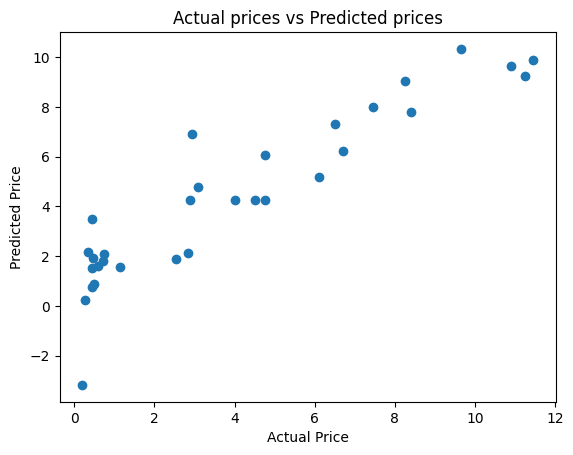

In [91]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()

## Lasso Regression

In [94]:
#loading the linear regression model
lass_reg_model = Lasso()

In [95]:
lass_reg_model.fit(X_train,Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [96]:
#Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)


In [98]:
#R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173201


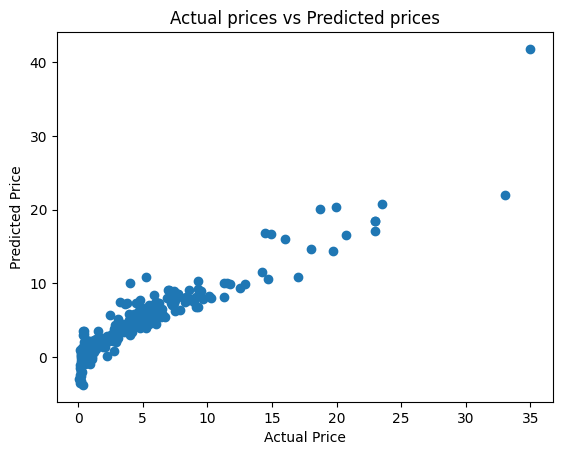

In [99]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [100]:
#Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)


In [101]:
#R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173201


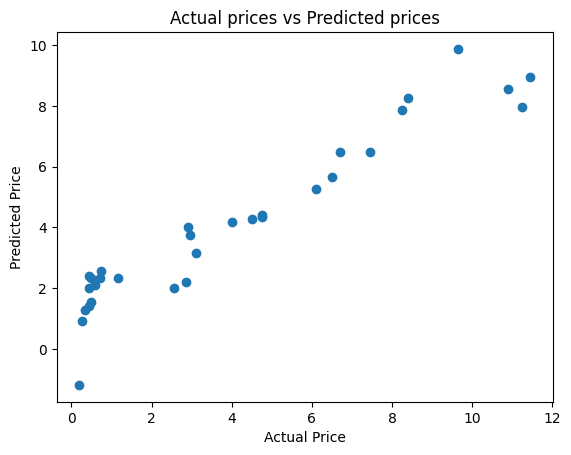

In [102]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()